In [62]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='poster')
from matplotlib import pyplot as plt
from figures.plotting import plot_metrics_categorical, plot_metrics_trend, plot_corr_heatmap

dataset = 'imagenet21k'
pooling = True
data = pd.read_csv(f'../results/manifolds|dataset:{dataset}|pooling:{pooling}.csv')

metric_columns = ['between-concept radius', 'within-concept radius (mean)', 'between-concept dimensionality', 'within-concept dimensionality (mean)', 
                  'signal (mean)', 'bias (mean)', 'other signal-noise-overlap (mean)', 'self signal-noise-overlap (mean)', 'signal-noise-ratio (mean)']
metric_label_map = {'between-concept dimensionality': 'inter-dim', 'between-concept radius': 'inter-radius', 
                    'bias (mean)': 'bias', 'signal (mean)': 'signal', 'signal-noise-ratio (mean)': 'snr', 
                    'other signal-noise-overlap (mean)': 'other-sno', 'self signal-noise-overlap (mean)': 'self-sno', 
                    'within-concept dimensionality (mean)': 'intra-dim', 'within-concept radius (mean)': 'intra-radius'}
metric_short_labels = [metric_label_map[c] for c in metric_columns]
tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

data.head()

,between-concept dimensionality,between-concept radius,bias (mean),bias (std),layer,other signal-noise-overlap (mean),other signal-noise-overlap (std),self signal-noise-overlap (mean),self signal-noise-overlap (std),signal (mean),...,signal-noise-ratio (mean),signal-noise-ratio (std),within-concept dimensionality (mean),within-concept dimensionality (std),within-concept radius (mean),within-concept radius (std),architecture,task,kind,source
0,2.064051,0.159131,0.007202,0.121053,layer1.0.relu,17.254047,12.142444,17.223497,12.083454,4.410479,...,0.633373,0.252586,3.276120,0.666034,0.332144,0.027937,ResNet18,None,Untrained,PyTorch
1,1.828975,0.212732,0.006971,0.119055,layer1.1.relu,18.126385,12.972058,18.092890,12.900348,4.418779,...,0.599946,0.238396,3.118596,0.607552,0.438829,0.036474,ResNet18,None,Untrained,PyTorch
2,1.639475,0.296849,0.007799,0.125995,layer2.0.relu,19.025740,13.857557,18.979851,13.776237,4.470674,...,0.590577,0.243234,3.103622,0.674974,0.599183,0.052644,ResNet18,None,Untrained,PyTorch
3,1.531417,0.431102,0.008833,0.134202,layer2.1.relu,20.244587,14.829509,20.189466,14.726065,4.591555,...,0.582582,0.250919,2.944683,0.652592,0.845342,0.078564,ResNet18,None,Untrained,PyTorch
4,1.473538,0.551655,0.008937,0.134972,layer3.0.relu,20.066460,14.578789,19.996643,14.446871,4.632761,...,0.595459,0.265719,3.380508,0.938684,1.066697,0.098989,ResNet18,None,Untrained,PyTorch


---
# Manifold metric statistics

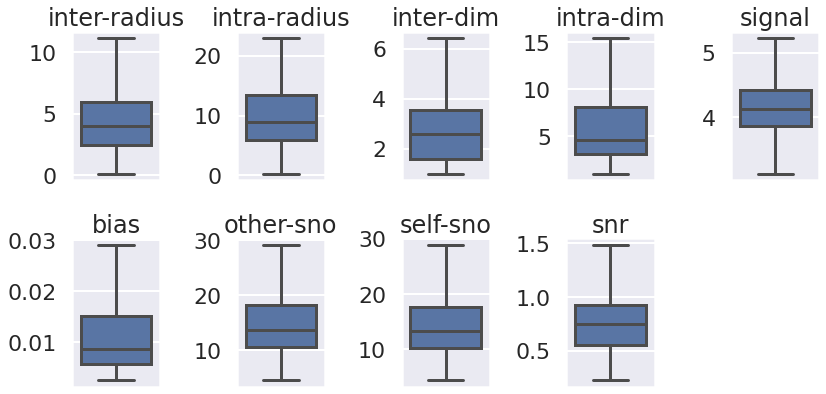

In [71]:
fig, axs = plot_metrics_categorical(kind='box', data=data, x=None, ys=metric_columns, 
                                    labels=metric_short_labels, 
                                    plt_kwargs={'showfliers': False}, 
                                    fig_kwargs={'figsize': (12, 6)})
plt.show()

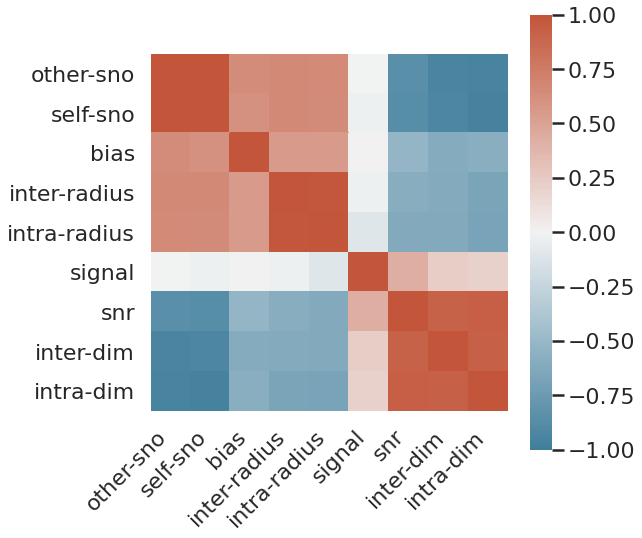

In [64]:
fig, ax = plt.subplots(figsize=(8, 8))
results = data[metric_columns].rename(columns=metric_label_map)
plot_corr_heatmap(data=results, ax=ax, method='spearman')
plt.show()

---
# Untrained vs. Supervised Object Classification

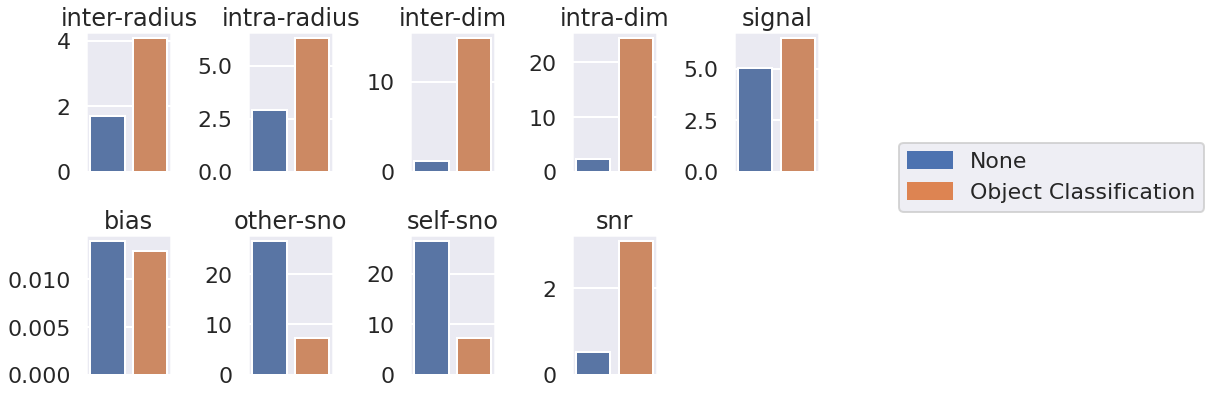

In [65]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet18') & 
               (data.layer == 'layer4.1.relu')]

fig, axs = plot_metrics_categorical(kind='bar', data=results, x='task', ys=metric_columns, 
                                    labels=metric_short_labels, fig_kwargs={'figsize': (12, 6)})
plt.show()

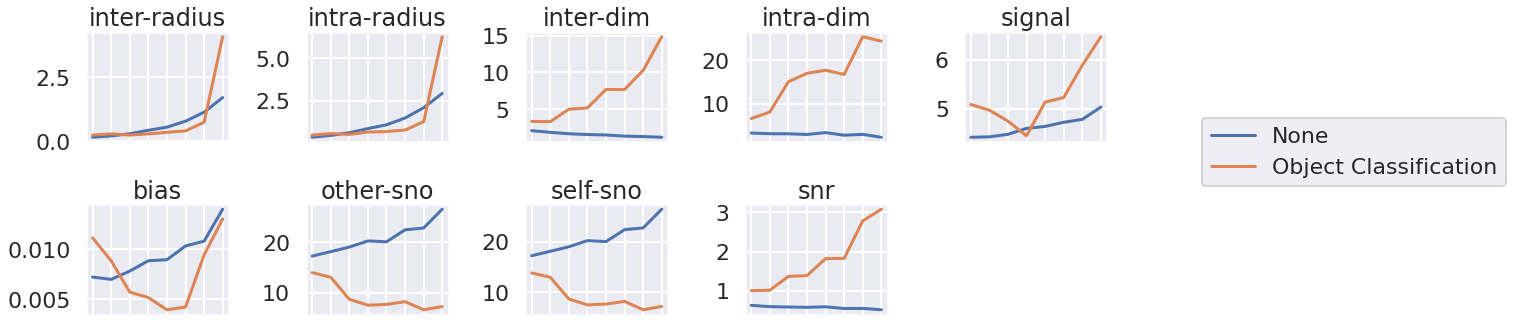

In [66]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet18')]

fig, axs = plot_metrics_trend(data=results, x='layer', ys=metric_columns, hue='task', 
                              labels=metric_short_labels, fig_kwargs={'figsize': (16, 5)})
plt.show()

---
# Yamins Self-Supervised

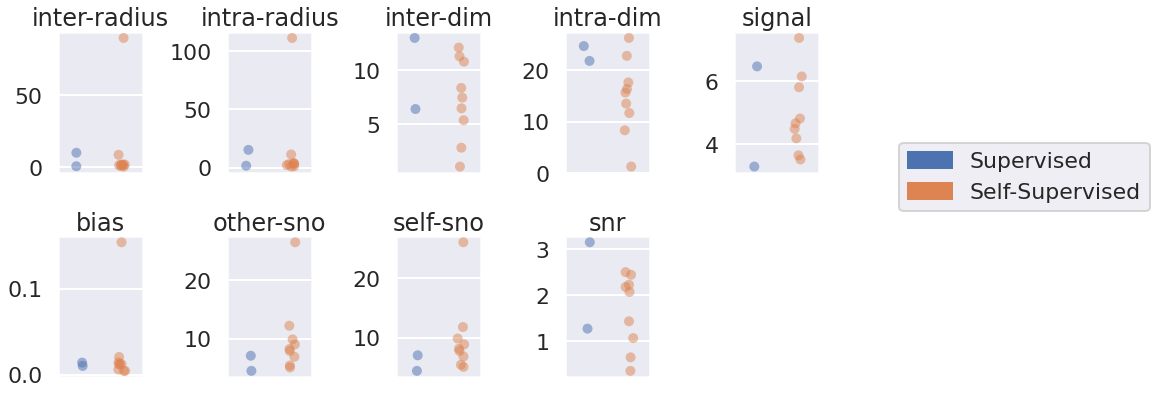

In [67]:
results = data[(data.source == 'VVS') & 
               (data.layer == 'layer4.1.relu')]

fig, axs = plot_metrics_categorical(kind='strip', data=results, x='kind', ys=metric_columns, 
                                    labels=metric_short_labels, 
                                    plt_kwargs={'alpha': 0.5, 'size': 10}, 
                                    fig_kwargs={'figsize': (12, 6)})
plt.show()

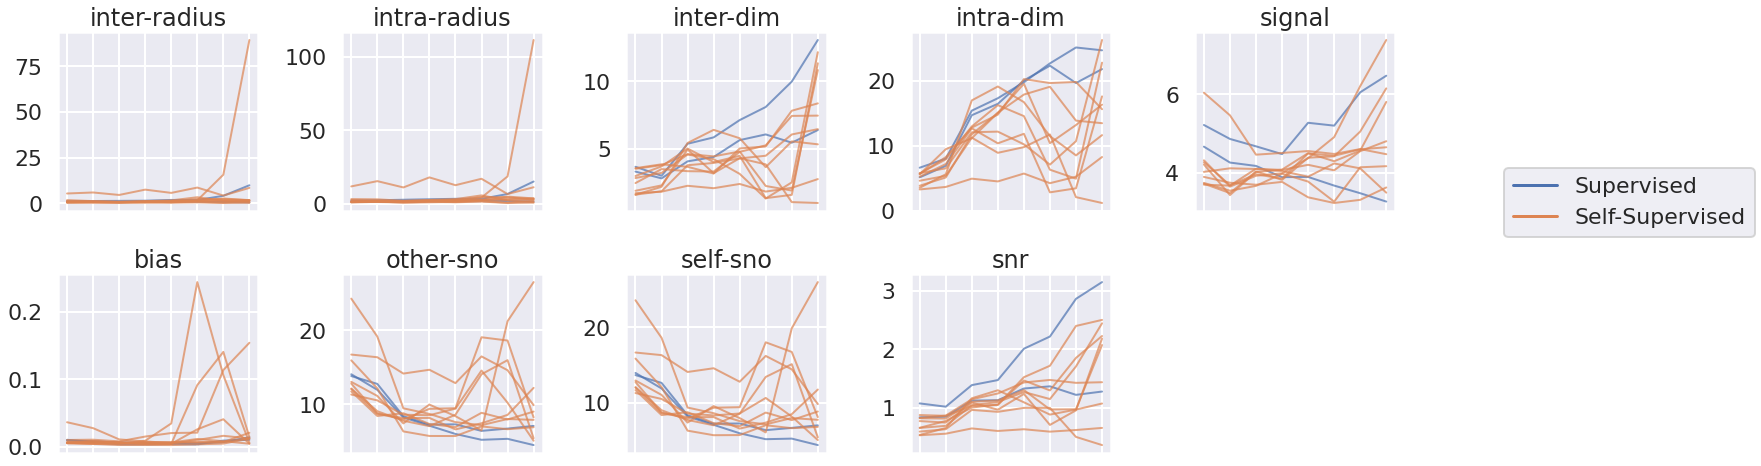

In [68]:
results = data[(data.source == 'VVS')]

fig, axs = plot_metrics_trend(data=results, x='layer', ys=metric_columns, hue='kind', 
                              labels=metric_short_labels, 
                              plt_kwargs={'units': 'task', 'estimator': None, 'lw': 2, 'alpha': 0.7}, 
                              fig_kwargs={'figsize': (20, 7)})
plt.show()

---
# Taskonomy

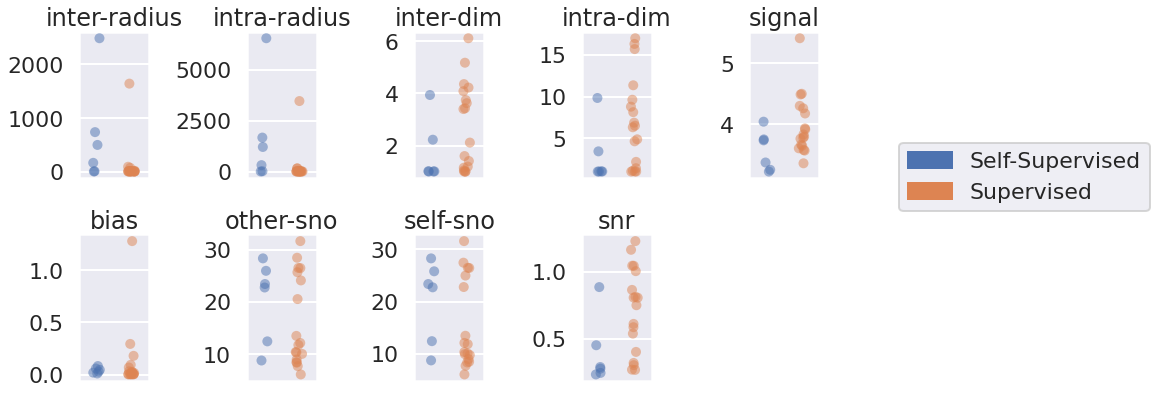

In [69]:
results = data[(data.source == 'Taskonomy') & 
               (data.layer == 'layer4.1.relu')]

fig, axs = plot_metrics_categorical(kind='strip', data=results, x='kind', ys=metric_columns, 
                                    labels=metric_short_labels, 
                                    plt_kwargs={'alpha': 0.5, 'size': 10}, 
                                    fig_kwargs={'figsize': (12, 6)})
plt.show()

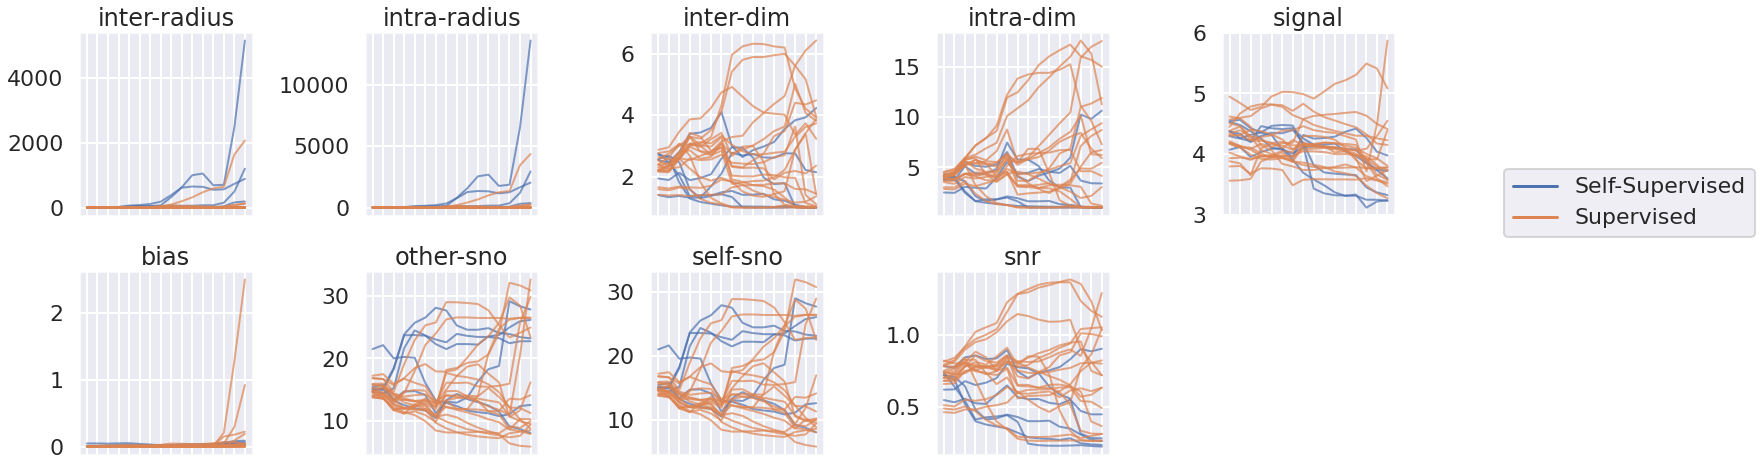

In [70]:
results = data[(data.source == 'Taskonomy')]

fig, axs = plot_metrics_trend(data=results, x='layer', ys=metric_columns, hue='kind', 
                              labels=metric_short_labels, 
                              plt_kwargs={'units': 'task', 'estimator': None, 'lw': 2, 'alpha': 0.7}, 
                              fig_kwargs={'figsize': (20, 7)})
plt.show()